In [1]:
import torch 
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from dataset import AfricanWildlifeDataset
from loss import YoloLoss
from YOLOv1 import YOLOv1
from train import train
from test import test
from utils import plot_bbox

In [2]:
LEARNING_RATE = 2e-5
DEVICE = "cuda" if torch.cuda.is_available else "cpu"
BATCH_SIZE = 5
EPOCHS = 10
TRAIN_DIR = 'African_Wildlife/train'
TEST_DIR = 'African_Wildlife/test'
LABEL_DIR = 'African_Wildlife/annotations'
S, B, C = 7, 2, 4

## Loading data

In [3]:
transform = transforms.Compose([transforms.Resize((448, 448)), transforms.ToTensor()])

train_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, transform=transform)
train_loader = DataLoader(
    dataset = train_set,
    batch_size = BATCH_SIZE, 
    shuffle = True
)

test_set = AfricanWildlifeDataset(TRAIN_DIR, TEST_DIR, LABEL_DIR, istesting=True, transform=transform)
test_loader = DataLoader(dataset=test_set, batch_size= 3, shuffle= False)

## Training

In [4]:
model = YOLOv1(input_channels=3, S=S, B=B, C=C).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = YoloLoss()


In [5]:
train(train_loader, model, optimizer, criterion, EPOCHS, DEVICE)


100%|██████████| 240/240 [00:33<00:00,  7.25it/s, loss=0.0864]


 EPOCH0:  Mean loss 0.087


100%|██████████| 240/240 [00:31<00:00,  7.53it/s, loss=0.0513]


 EPOCH1:  Mean loss 0.061


100%|██████████| 240/240 [00:32<00:00,  7.47it/s, loss=0.0306]


 EPOCH2:  Mean loss 0.052


100%|██████████| 240/240 [00:32<00:00,  7.49it/s, loss=0.03]  


 EPOCH3:  Mean loss 0.046


100%|██████████| 240/240 [00:32<00:00,  7.47it/s, loss=0.087] 


 EPOCH4:  Mean loss 0.042


100%|██████████| 240/240 [00:32<00:00,  7.49it/s, loss=0.0281]


 EPOCH5:  Mean loss 0.038


100%|██████████| 240/240 [00:32<00:00,  7.50it/s, loss=0.034] 


 EPOCH6:  Mean loss 0.033


100%|██████████| 240/240 [00:32<00:00,  7.50it/s, loss=0.0408]


 EPOCH7:  Mean loss 0.028


100%|██████████| 240/240 [00:32<00:00,  7.49it/s, loss=0.0161]


 EPOCH8:  Mean loss 0.026


100%|██████████| 240/240 [00:31<00:00,  7.51it/s, loss=0.0236] 

 EPOCH9:  Mean loss 0.023


## Testing

In [8]:
y_pred = test(test_loader, model)

3
2
1
3
3
3


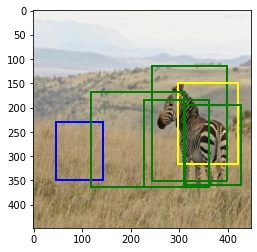

In [12]:
idx = 131
bbx = y_pred[idx, y_pred[idx, ::, 1] > 0]
plot_bbox(idx, test_set, bbx)